# Python Plots for LGalaxies

## Import Libraries and Read Catalogs

<p>Use functions read_snap or read_tree to read catalogs. These are both defined in procedures.py. In case of read_snap, SnapshotList will be returned containing the list of snapshots read (usefull to later select galaxies in a given redshift).<p>

In [47]:
import numpy as np
%matplotlib inline

import pandas as pd

%pylab inline
#import seaborn as sns
#sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *

import procedures
reload (procedures)
from procedures import *
import plots_input
reload (plots_input)
from plots_input import *

FirstFile = 0
LastFile =  0

Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 
Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 

if CatalogType=='snap':
    from LGalaxies_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_Henriques2015a_struct import PropertiesToRead
    (G_MR, SnapshotList) = read_snap(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead,LGalaxiesStruct,RedshiftsToRead,RedshiftList)
    
if CatalogType=='tree':    
    from LGalaxies_tree_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_tree_Henriques2015a_struct import PropertiesToRead_tree    
    (G_MR) = read_tree(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead_tree,LGalaxiesStruct,RedshiftsToRead,RedshiftList)    
     
    SnapshotList = np.zeros(len(RedshiftList),dtype=np.int32)
    for ii in range(0,len(RedshiftList)):                  
        G0=G_MR[ np.rint(G_MR['Redshift']*100.) == RedshiftList[ii]*100. ]             
        SnapshotList[ii]=G0['SnapNum'][0]
#endif      

print('reading done\n')
#print (np.log10(gal['StellarMass'][1:5]*1.e10))
#help(gal)


plt.rcParams.update({'font.size': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.linewidth': 2, 
                     'xtick.major.size': 6, 'xtick.major.width': 1.5, 
                     'ytick.major.size': 6, 'ytick.major.width': 1.5, 
                     'xtick.minor.size': 3, 'xtick.minor.width': 1.,                   
                     'ytick.minor.size': 3, 'ytick.minor.width': 1.})

Populating the interactive namespace from numpy and matplotlib


Reading Headers

TotNgals= [2332354]


File  0  nGals =  [2332354]
reading done



## Plots

Doing frame: 0
Doing frame: 1
Doing frame: 2
Doing frame: 3
Doing frame: 4
Doing frame: 5
Doing frame: 6
Doing frame: 7
Doing frame: 8
Doing frame: 9
Doing frame: 10
Doing frame: 11
Doing frame: 12
Doing frame: 13
Doing frame: 14
Doing frame: 15
Doing frame: 16
Doing frame: 17
Doing frame: 18
Doing frame: 19
Doing frame: 20
Doing frame: 21
Doing frame: 22
Doing frame: 23
Doing frame: 24
Doing frame: 25
Doing frame: 26
Doing frame: 27
Doing frame: 28
Doing frame: 29
Doing frame: 30
Doing frame: 31
Doing frame: 32
Doing frame: 33
Doing frame: 34
Doing frame: 35
Doing frame: 36
Doing frame: 37


/Users/BrunoHenriques/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


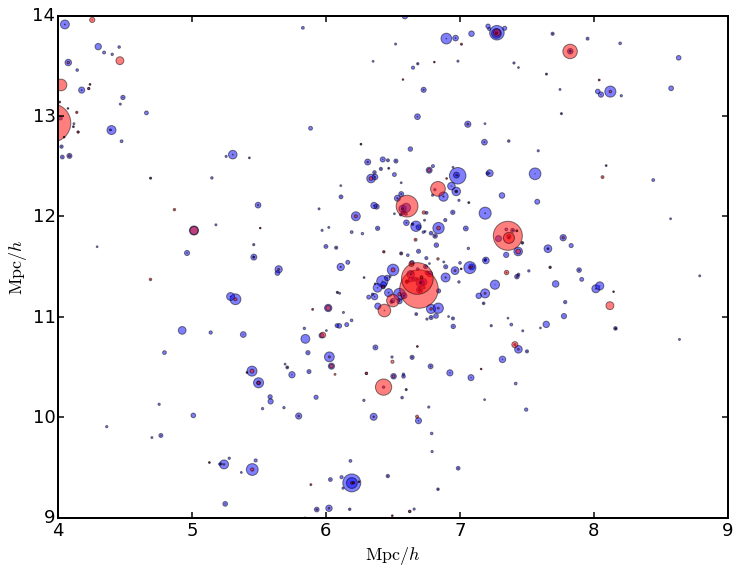

In [49]:

with PdfPages('./fig/plots.pdf') as pdf:
    import plots
    reload (plots)
    
    if opt_stellar_mass_function==1:
        from plots import stellar_mass_function
        stellar_mass_function(G_MR, SnapshotList, Volume_MR, pdf)
        
    if opt_bluck_red_fractions==1:
        from plots import bluck_red_fractions
        bluck_red_fractions(G_MR, SnapshotList, pdf)
             
    if opt_test_plots==1:
        from plots import test_plots     
        test_plots(G_MR, SnapshotList, pdf)
        
        
    if opt_positions==1:
        import matplotlib.animation as animation
        from matplotlib.patches import Ellipse
        class AnimatedScatter(object):
            
            def __init__(my_object):               
                my_object.fig, my_object.ax1 = plt.subplots(figsize=(12,9))                 
                my_object.anim = animation.FuncAnimation(my_object.fig, my_object.update, 
                                                         init_func=my_object.setup_plot, 
                                                         frames=38, blit=True)
                
            # initialization function: plot the background of each frame
            def setup_plot(my_object):            
                xlim=[4.0,9.] #file 0  (0<z<20)
                ylim=[9.0,14.]                
                my_object.ax1.set_xlim(xlim), my_object.ax1.set_ylim(ylim)
                xlab='$\mathrm{Mpc}/h$'
                ylab='$\mathrm{Mpc}/h$'
                my_object.ax1.set_xlabel(xlab), my_object.ax1.set_ylabel(ylab)
            
                G0_MR=G_MR[(G_MR['StellarMass']>0.1) & (G_MR['SnapNum']==20)]               
                disk =G0_MR['DiskMass']*30
                bulge=G0_MR['BulgeMass']*30
                mass=np.append(disk,bulge)                
                color=np.zeros((len(mass), 3))
                color[0:len(disk)]=(0.0, 0.0, 1.0)
                color[len(disk):len(mass)]=(1.0, 0.0, 0.0)                               
                pos_x=np.append(G0_MR['Pos'][:,0],G0_MR['Pos'][:,0])
                pos_y=np.append(G0_MR['Pos'][:,1],G0_MR['Pos'][:,1])                                                             
               
                my_object.scat=my_object.ax1.scatter(pos_x, pos_y, c=color, s=mass, marker='o', animated=True, alpha=0.5)   
                return my_object.scat,

            # animation function.  This is called sequentially
            def update(my_object, nframe): 
                print("Doing frame:", nframe)
                G0_MR=G_MR[(G_MR['StellarMass']>0.1) & (G_MR['SnapNum']==20+nframe)]
                #                         (G_MR['Pos'][:,2]>430.) & (G_MR['Pos'][:,2]<450.)]                
                disk =G0_MR['DiskMass']*30
                bulge=G0_MR['BulgeMass']*30
                mass=np.append(disk,bulge)             
                color=np.zeros((len(mass), 3))
                color[0:len(disk)]=(0.0, 0.0, 1.0)
                color[len(disk):len(mass)]=(1.0, 0.0, 0.0)                               
                pos_x=np.append(G0_MR['Pos'][:,0],G0_MR['Pos'][:,0])
                pos_y=np.append(G0_MR['Pos'][:,1],G0_MR['Pos'][:,1])                                   
                my_object.scat.remove()                
                # Set x and y data...                
                my_object.scat=my_object.ax1.scatter(pos_x, pos_y, c=color, s=mass, marker='o', animated=True, alpha=0.5)
                #my_object.scat=my_object.ax1.add_artist(Ellipse(xy=xy, width=2, height=2))
                # Set sizes...
                #my_object.scat._sizes = mass
                # Set colors..
                #my_object.scat.set_array(data[3])

                # We need to return the updated artist for FuncAnimation to draw..
                # Note that it expects a sequence of artists, thus the trailing comma.
                return my_object.scat,
    
            def save(my_object):            
                my_object.anim.save('./animations/positions.mp4', fps=1)
                
        if __name__ == '__main__':
            a = AnimatedScatter()
            a.save()
        
#end with PdfPages('./fig/plots.pdf') as pdf: 

## Animations

finished
finished
doing frame: 0
doing frame:

/Users/BrunoHenriques/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/Users/BrunoHenriques/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


 0
doing frame: 1
doing frame: 2
doing frame: 3
doing frame: 4
doing frame: 5
doing frame: 6
doing frame: 7
doing frame: 8
doing frame: 9
doing frame: 10
doing frame: 11
doing frame: 12
doing frame: 13
doing frame: 14
doing frame: 15
doing frame: 16
doing frame: 17
doing frame: 18
doing frame: 19
doing frame: 20
doing frame: 21
doing frame: 22
doing frame: 23
doing frame: 24
doing frame: 25
doing frame: 26
doing frame: 27
doing frame: 28
doing frame: 29
doing frame: 30
doing frame: 31
doing frame: 32
doing frame: 33
doing frame: 34
doing frame: 35
doing frame: 36
doing frame: 37
doing frame: 38


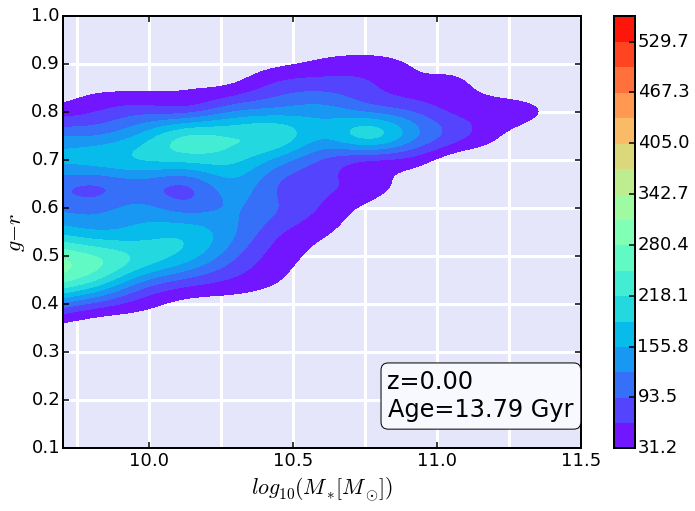

In [2]:
import animations
reload (animations)
    
if opt_anime_mass_gr==1:   
    from animations import anime_mass_gr
    anime_mass_gr(G_MR)

In [22]:
a=np.array([1,2,3,4])
b=np.array([7,8,9,10])
x=np.vstack([a,b])
print(a, b)

[1 2 3 4] [ 7  8  9 10]
